In [1]:
from plot_setup import * 
import MCgenerator, dSph_model, coord

In [21]:
prms = {
    "re":r"$r_e[\mathrm{pc}]$",
    "sigmafg":r"\tilde{\Sigma}_\mathrm{FG}"
}
dSph_property = pd.read_csv("dSph_property.csv",index_col=0)
draco_prop = dSph_property.loc["Draco"]

In [13]:
class KI17_loglikelihood_mod:
    def __init__(self,Rs):
        self.Rs = Rs
        self.RoI_R = np.max(Rs) # use Rs.max as the RoI
        print(self.Rs)

    def __call__(self,re,sigmafg):
        if re<0 or sigmafg<0:
            return -np.inf
        else:
            mem = dSph_model.plummer_model(re_pc=re)
            fg = dSph_model.uniform2d_model(Rmax_pc=self.RoI_R)
            
            C1 = 1/mem.cdf_R(self.RoI_R)
            C0 = fg.density_2d(self.RoI_R) # fg.density_2d returns constant for arbitrary input
            s = C0/(sigmafg*mem.density_2d(self.Rs)*C1 + C0)
            
            loglikelis = np.log(2*np.pi*self.Rs)+np.log(s*C1*mem.density_2d(self.Rs)+(1-s)*C0)
            return np.sum(loglikelis)

,x,y
0,0.748809,0.045178
1,-0.018739,-0.744644
2,0.338480,-0.829655
3,0.830130,-0.173570
4,0.945128,-0.338969
5,1.147562,-0.725254
6,-0.655485,-1.076283
7,-0.239943,-1.385900
8,-0.373282,-1.394135
9,-0.801651,0.408573


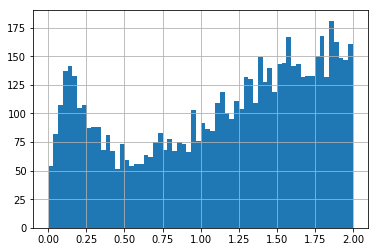

In [55]:
df0 = np.loadtxt("Draco_SDSS_cut_xy2.0.csv",comments="#",delimiter=",")
df = pd.DataFrame(df0,columns=("x","y"))
display(df)
pd.Series(np.sqrt(df.x**2+df.y**2)).hist(bins=64)

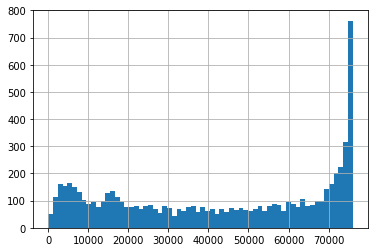

In [56]:
ra0 = coord.hms_to_deg(draco_prop.RAh,draco_prop.RAm,draco_prop.RAs)
de0 = coord.dms_to_deg(draco_prop.pmDEd,draco_prop.DEm,draco_prop.DEs)
#ra = coord.hms_to_deg(df.RAh,df.RAm,df.RAs) + ra0
#de = coord.dms_to_deg(df.pmDEd,df.DEm,df.DEs) + de0
ra = df.x + ra0
de = df.y + de0

dist = draco_prop.DIST
Rs = coord.projected_distance(dist=dist,ra=ra,de=de,ra_center=ra0,de_center=de0)
pd.Series(Rs).hist(bins=64)

In [14]:
hoge = KI17_loglikelihood_mod(np.arange(100)+1)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [15]:
hoge(50,0.5)

-489.1766764518841